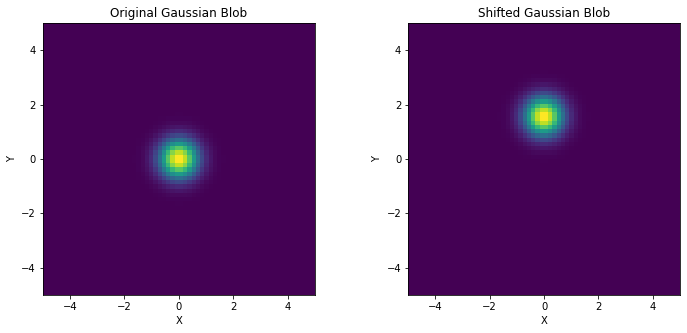

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fftn, ifftn

# Create a 3D grid
n = 64  # Number of grid points in each dimension
x = np.linspace(-5, 5, n)
y = np.linspace(-5, 5, n)
z = np.linspace(-5, 5, n)
X, Y, Z = np.meshgrid(x, y, z)

# Define the Gaussian function in real space
sigma = 0.5
gaussian_blob = np.exp(-(X**2 + Y**2 + Z**2) / (2 * sigma**2))

# Perform Fourier transform
gaussian_blob_fft = fftn(gaussian_blob)

# Create a phase shift in Fourier space to translate 10 units in the x-direction
kx, ky, kz = np.meshgrid(np.fft.fftfreq(n), np.fft.fftfreq(n), np.fft.fftfreq(n))
shift_factor = np.exp(2j * np.pi * kx * 10)

# Apply the shift in Fourier space
shifted_gaussian_blob_fft = gaussian_blob_fft * shift_factor

# Perform inverse Fourier transform
shifted_gaussian_blob = np.real(ifftn(shifted_gaussian_blob_fft))

# Plot the original and shifted Gaussian blobs
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(gaussian_blob[n//2], extent=(-5, 5, -5, 5),
                cmap='viridis')
axes[0].set_title('Original Gaussian Blob')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[1].imshow(shifted_gaussian_blob[n//2], extent=(-5, 5, -5, 5),
                cmap='viridis')
axes[1].set_title('Shifted Gaussian Blob')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')

plt.show()


# Everything below is irrelevant - just me playing with the code

## 1D FFT


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [12,12]
plt.rcParams.update({'font.size': 18})

In [2]:
n = 64 # Number of frequencies
L = 30 # Interval
dx = L/n
x = np.arange(-L/2, L/2, dx, dtype = 'complex_')
f = np.cos(x)*np.exp(-np.power(x,2)/25) #Function
df = -(np.sin(x)*np.exp(-np.power(x,2)/25) + (2/25)*x*f) #Derivative

In [3]:
# Spectral Derivative
fhat = np.fft.fft(f)
kappa = (2*np.pi/L)*np.arange(-n/2,n/2)
kappa = np.fft.fftshift(kappa) #Re-order fft frequencies
dfhat = kappa*fhat* (1j)
dfFFT = np.real(np.fft.ifft(dfhat))

c:\Users\Adity\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


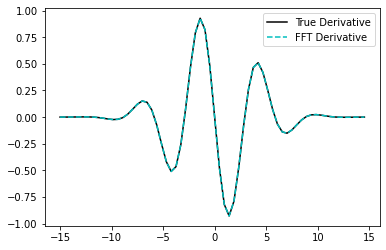

In [4]:
## Plots 
plt.plot(x, df.real,color = 'k',  label = 'True Derivative')
plt.plot(x, dfFFT.real, '--', color = 'c',  label = 'FFT Derivative' )
plt.legend()
plt.show()

## Gaussian 2D

c:\Users\Adity\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_multivariate.py:494: ComplexWarning: Casting complex values to real discards the imaginary part
  x = np.asarray(x, dtype=float)
c:\Users\Adity\AppData\Local\Programs\Python\Python310\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:1180: ComplexWarning: Casting complex values to real discards the imaginary part
  v1[poly_i, :] = ps[i1, :] - ps[i2, :]
c:\Users\Adity\AppData\Local\Programs\Python\Python310\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:1181: ComplexWarning: Casting complex values to real discards the imaginary part
  v2[poly_i, :] = ps[i2, :] - ps[i3, :]


(4096,)
(64, 64)


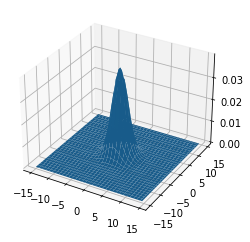

In [5]:
n = 64 # Number of frequencies
L = 30 # Interval
dx = L/n
dy = L/n
#dz = L/n
x = np.arange(-L/2, L/2, dx, dtype = 'complex_')
y = np.arange(-L/2, L/2, dy, dtype = 'complex_')
#z = np.arange(-L/2, L/2, dz, dtype = 'complex_')

kx = np.linspace(-np.pi*2 /L, np.pi*2 / L, x.shape[0])  # wavenumber along X axis (rad/mm)
ky = np.linspace(-np.pi*2 /L, np.pi*2 / L, y.shape[0])

#x, y = np.mgrid[-1.0:1.0:100j, -1.0:1.0:100j]

X, Y = np.meshgrid(x,y)
# Need an (N, 2) array of (x, y) pairs.
xy = np.column_stack([X.flat, Y.flat])

mu = np.array([0.0, 0.0])

sigma = np.array([2,2])
covariance = np.diag(sigma**2)

Z = multivariate_normal.pdf(xy, mean=mu, cov=covariance)
print(Z.shape)
# Reshape back to a (30, 30) grid.
z = Z.reshape(X.shape)
print(z.shape)




fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')



ax.plot_surface(X,Y,z)
#ax.plot_wireframe(x,y,z)

plt.show()

c:\Users\Adity\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\transforms.py:2860: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


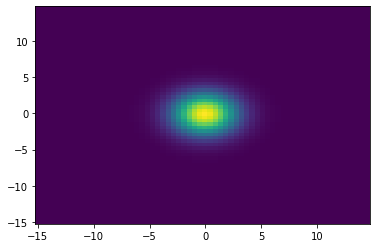

In [6]:
plt.pcolor(X, Y, z);

In [7]:
spectrum_2d = np.fft.fft2(z)
spectrum_2d_sh = np.fft.fftshift(spectrum_2d)

Text(0, 0.5, 'ky, rad/mm')

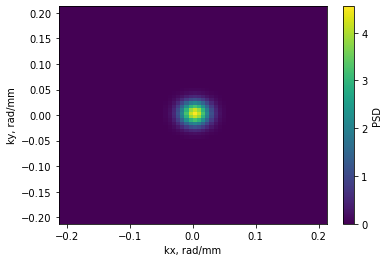

In [8]:
plt.figure()
Ky, Kx = np.meshgrid(ky, kx, indexing='ij')
psd = plt.pcolormesh(Kx, Ky, abs(spectrum_2d_sh))
cbar = plt.colorbar(psd, label='PSD')
plt.xlabel('kx, rad/mm')
plt.ylabel('ky, rad/mm')

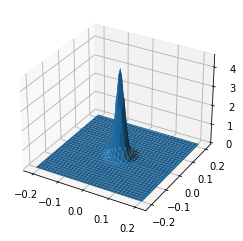

In [9]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')



ax.plot_surface(Kx, Ky, abs(spectrum_2d_sh))

In [10]:
#Translating the blob by multiplying in k-space
a = 20; b = 0
Ky_exp, Kx_exp = np.meshgrid(ky, kx, indexing='ij')
kdotdr = a*ky
translation_factor = np.exp(1j*kdotdr)#np.exp(1j*a*Ky_exp)*np.exp(1j*b*Kx_exp)
print(translation_factor.shape)

(64,)


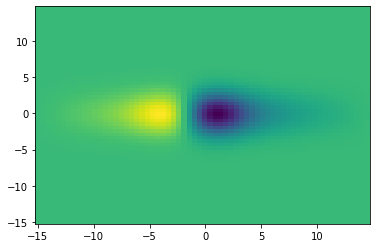

In [11]:
z_t = np.real(np.fft.ifft2(translation_factor*np.fft.fft2(z)))
plt.pcolor(X, Y, z_t);

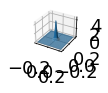

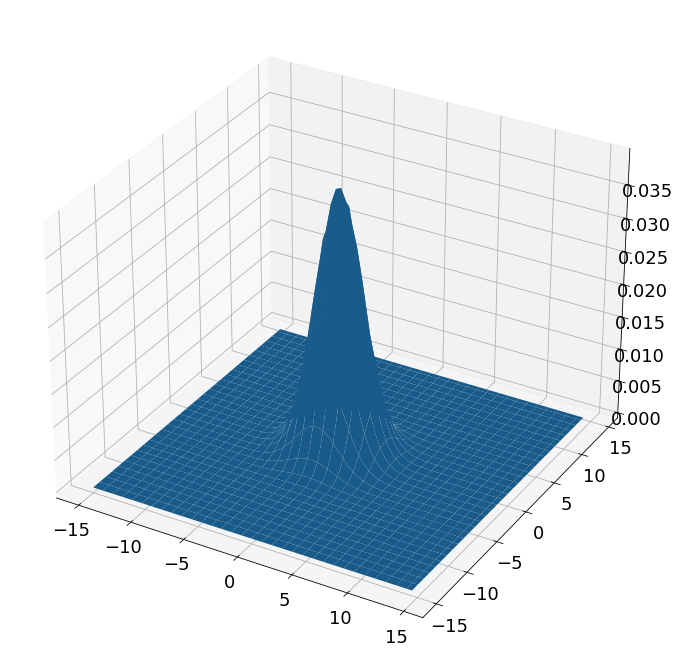

In [31]:
spectrum_2d_sh_trans = spectrum_2d_sh*translation_factor
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Kx, Ky,abs(spectrum_2d_sh_trans))

z_trans = np.real(np.fft.ifft2(spectrum_2d_sh_trans))
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')



ax.plot_surface(X,Y,abs(z_trans))
#ax.plot_wireframe(x,y,z)

plt.show()

In [12]:
n = 64 # Number of frequencies
L = 30 # Interval
dx = L/n
dy = L/n
dz = L/n
x = np.arange(-L/2, L/2, dx, dtype = 'complex_')
y = np.arange(-L/2, L/2, dy, dtype = 'complex_')
z = np.arange(-L/2, L/2, dz, dtype = 'complex_')


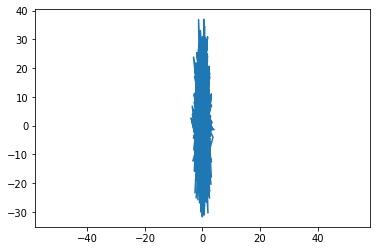

In [13]:
mean = [0, 0]
cov = [[1, 0], [0, 100]]  # diagonal covariance
import matplotlib.pyplot as plt
x, y = np.random.multivariate_normal(mean, cov, 5000).T
plt.plot(x, y)
plt.axis('equal')
plt.show()

## Corrected

In [14]:
import numpy as np
import matplotlib.pyplot as plt

fftn = np.fft.fftn
ifftn = np.fft.ifftn

In [15]:
N = 100
L=N

kxxx = 2*np.pi*np.fft.fftfreq(N) #implicitly assumes that smallest length scale is 1, the largest wavevector determines the smallest 
print(kxxx)
kx, ky, kz = np.meshgrid(kxxx, kxxx, kxxx)

[ 0.          0.06283185  0.12566371  0.18849556  0.25132741  0.31415927
  0.37699112  0.43982297  0.50265482  0.56548668  0.62831853  0.69115038
  0.75398224  0.81681409  0.87964594  0.9424778   1.00530965  1.0681415
  1.13097336  1.19380521  1.25663706  1.31946891  1.38230077  1.44513262
  1.50796447  1.57079633  1.63362818  1.69646003  1.75929189  1.82212374
  1.88495559  1.94778745  2.0106193   2.07345115  2.136283    2.19911486
  2.26194671  2.32477856  2.38761042  2.45044227  2.51327412  2.57610598
  2.63893783  2.70176968  2.76460154  2.82743339  2.89026524  2.95309709
  3.01592895  3.0787608  -3.14159265 -3.0787608  -3.01592895 -2.95309709
 -2.89026524 -2.82743339 -2.76460154 -2.70176968 -2.63893783 -2.57610598
 -2.51327412 -2.45044227 -2.38761042 -2.32477856 -2.26194671 -2.19911486
 -2.136283   -2.07345115 -2.0106193  -1.94778745 -1.88495559 -1.82212374
 -1.75929189 -1.69646003 -1.63362818 -1.57079633 -1.50796447 -1.44513262
 -1.38230077 -1.31946891 -1.25663706 -1.19380521 -1.

In [41]:
x, y, z = np.meshgrid(np.linspace(0, L, N), np.linspace(0, L, N), np.linspace(0,L,N))
rr = np.sqrt( ((x-L/2)*(x-L/2)+(y-L/2)*(y-L/2)+(z-L/2)*(z-L/2))*.5 )

sig = (np.exp(-10*rr))
sig_k=fftn(sig)
xD, yD, zD = 10, 0, 0
kdotr = kx*xD + ky*yD + kz*zD
sig_k_new = sig_k*np.exp(-1j*kdotr)
sig_new = ifftn(sig_k_new).real
#plt.rcParams["figure.figsize"] = [7.00, 3.50]
# plt.rcParams["figure.autolayout"] = True
# ax = fig.add_subplot(111, projection='3d')
# fig = plt.figure()
# img = ax.scatter3D(x, y, z, sig = 5,c = sig, cmap='YlOrRd', alpha=1)
# plt.show()

In [42]:
sig_slice = sig[:,:,0]
sig_new_slice = sig_new[:,:,0]
print(sig_slice.shape)

(100, 100)


(100, 100)


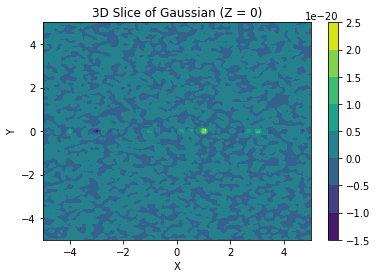

In [43]:

#To create 3D slices of a Gaussian function as a function of x and y with constant z, you can use Python's NumPy and Matplotlib libraries. Here's a sample code to generate and plot these slices:


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the Gaussian function
def gaussian(x, y, z, mu_x, mu_y, mu_z, sigma):
    return np.exp(-(x - mu_x)**2 / (2 * sigma**2)) * np.exp(-(y - mu_y)**2 / (2 * sigma**2)) * np.exp(-(z - mu_z)**2 / (2 * sigma**2))

# Create a grid of values for x and y
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
z = 0  # Constant z value

# Create a meshgrid for x and y
X, Y = np.meshgrid(x, y)

# Set the parameters for the Gaussian function
mu_x = 0
mu_y = 0
mu_z = 0
sigma = 1.0

# Calculate the Gaussian values for the specified slice (constant z)
Z_slice = gaussian(X, Y, z, mu_x, mu_y, mu_z, sigma)
print(Z_slice.shape)
# Create a 2D contour plot of the Gaussian slice
plt.contourf(X, Y, sig_new_slice, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('3D Slice of Gaussian (Z = 0)')
plt.colorbar()
plt.show()

(64, 64, 64)


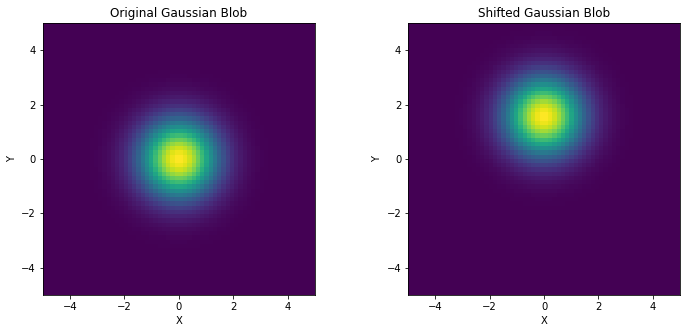

(64, 64)


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fftn, ifftn

# Create a 3D grid
n = 64  # Number of grid points in each dimension
x = np.linspace(-5, 5, n)
y = np.linspace(-5, 5, n)
z = np.linspace(-5, 5, n)
X, Y, Z = np.meshgrid(x, y, z)

# Define the Gaussian function in real space
sigma = 1.0
gaussian_blob = np.exp(-(X**2 + Y**2 + Z**2) / (2 * sigma**2))
print(gaussian_blob.shape)
# Perform Fourier transform
gaussian_blob_fft = fftn(gaussian_blob)

# Create a phase shift in Fourier space to translate 10 units in the x-direction
kx, ky, kz = np.meshgrid(np.fft.fftfreq(n), np.fft.fftfreq(n), np.fft.fftfreq(n))
shift_factor = np.exp(2j * np.pi * kx * 10)

# Apply the shift in Fourier space
shifted_gaussian_blob_fft = gaussian_blob_fft * shift_factor

# Perform inverse Fourier transform
shifted_gaussian_blob = np.real(ifftn(shifted_gaussian_blob_fft))

# Plot the original and shifted Gaussian blobs
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(gaussian_blob[n//2], extent=(-5, 5, -5, 5), cmap='viridis')
axes[0].set_title('Original Gaussian Blob')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[1].imshow(shifted_gaussian_blob[n//2], extent=(-5, 5, -5, 5), cmap='viridis')
axes[1].set_title('Shifted Gaussian Blob')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')

plt.show()
print(gaussian_blob[n//2].shape)